#Exercise
Estimate the location from WIFI Signal Strength

The dataset has 2,000 rows and 8 columns.The data contains wifi signal strength observed from 7 wifi devices on a smartphone collected in an indoor space which could be used to estimate the location in one of the four rooms.

You can use ANN analysis for this exerise to improve the ANN performance.

In [25]:
# Mounting our Drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [26]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [47]:
# Import data
# Define the path
path = "/drive/MyDrive/Colab Notebooks/wifi.csv"
df = pd.read_csv(path)

***Step 1: Explore Data***

In [48]:
df.head().T

,0,1,2,3,4
Wifi 1,-64,-68,-63,-61,-63
Wifi 2,-56,-57,-60,-60,-65
Wifi 3,-61,-61,-60,-68,-60
Wifi 4,-66,-65,-67,-62,-63
Wifi 5,-71,-71,-76,-77,-77
Wifi 6,-82,-85,-85,-90,-81
Wifi 7,-81,-85,-84,-80,-87
Room,1,1,1,1,1


In [29]:
df.shape

(2000, 8)

In [30]:
df.columns

Index(['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7',
       'Room'],
      dtype='object')

***Step 2: Split dataset***

In [49]:
#Convert Target Variable to one-hot encoding (as there is Room 1,2,3,4)
room_dummies = pd.get_dummies(df['Room'])
room_dummies

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1995,0,0,0,1
1996,0,0,0,1
1997,0,0,0,1
1998,0,0,0,1


In [50]:
# Extract features and target variable
X = df.drop('Room', axis =1 )
Y = room_dummies

In [51]:
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state =0)

print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

# SPlit into 80/20

X_train shape (1600, 7)
y_train shape (1600, 4)
X_test shape (400, 7)
y_test shape (400, 4)


In [52]:
# Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***Step 3: Build the sequential model***

In [53]:
from keras.models import Sequential
from keras.layers import Dense

# Building the sequential model 
# Define CNN model

L1=100
L2=100

model = Sequential()
model.add(Dense(L1,input_dim=7,activation='relu')) #for first hidden layer
model.add(Dense(L2,activation='relu')) #for second hidden layer

# output later
model.add(Dense(4,activation='softmax')) #the output layer of your neural network has four neurons (4rooms, use softmax as is multi-class classification)

In [54]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [55]:
# Train the model
history = model.fit(X_train, Y_train, epochs=25, batch_size=100,
                    validation_data=(X_test, Y_test))

Epoch 1/25
16/16 [==============================] - 1s 17ms/step - loss: 1.1593 - accuracy: 0.5719 - val_loss: 0.8602 - val_accuracy: 0.7775
Epoch 2/25
16/16 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.8475 - val_loss: 0.5012 - val_accuracy: 0.8600
Epoch 3/25
16/16 [==============================] - 0s 4ms/step - loss: 0.3767 - accuracy: 0.9275 - val_loss: 0.3191 - val_accuracy: 0.9300
Epoch 4/25
16/16 [==============================] - 0s 4ms/step - loss: 0.2381 - accuracy: 0.9575 - val_loss: 0.2206 - val_accuracy: 0.9475
Epoch 5/25
16/16 [==============================] - 0s 4ms/step - loss: 0.1660 - accuracy: 0.9631 - val_loss: 0.1746 - val_accuracy: 0.9525
Epoch 6/25
16/16 [==============================] - 0s 4ms/step - loss: 0.1304 - accuracy: 0.9650 - val_loss: 0.1468 - val_accuracy: 0.9575
Epoch 7/25
16/16 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9681 - val_loss: 0.1266 - val_accuracy: 0.9550
Epoch 8/25
16/16 [=

***Step 4: Visualize the graph***

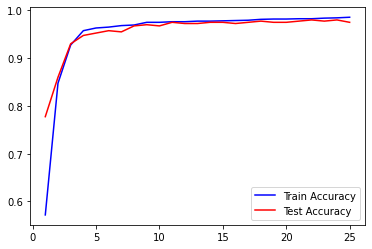

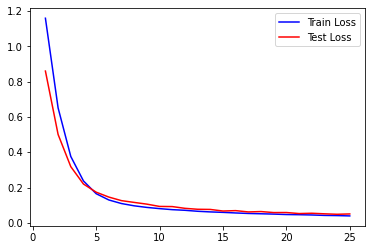

In [56]:
import matplotlib.pyplot as plt

acc2 =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc2)+1)


plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()